In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
state_df = pd.read_parquet('Vertices_Labels/California.parq')
state_df

,Longitude,Latitude,case,len_forward,len_backward,angle,offset,area,arc,ratio1,ratio2
0,-117.212186,32.775095,no,131.09,14.34,0.000000,0.000000,0.000000,65.556020,-0.128953,0.000000
1,-117.211686,32.773995,no,67.99,131.09,20.923366,50.015444,0.000277,-135.367346,-1.470665,-0.369479
2,-117.212157,32.774460,no,87.42,67.99,158.746826,14.912439,0.000188,-114.114171,-1.361882,-0.130680
3,-117.212486,32.775195,no,41.83,87.42,164.381949,8.082589,0.000084,-129.732223,-0.996283,-0.062302
4,-117.212742,32.775503,no,38.51,41.83,155.695381,8.747478,0.000056,-105.427603,-0.762040,-0.082971
...,...,...,...,...,...,...,...,...,...,...,...
186378,-122.380611,37.760188,no,351.44,47.38,87.717689,59.369533,0.001651,-95.479840,-4.177007,-0.621802
186379,-122.380913,37.763336,no,18.58,351.44,86.148920,23.497951,0.000647,-1.628760,-227.178968,-14.426896
186380,-122.380702,37.763342,no,350.77,18.58,93.861490,23.288178,0.000646,84.509750,4.370502,0.275568
186381,-122.380400,37.760200,no,37.94,350.77,92.295570,47.210957,0.001320,-3.194679,-121.674180,-14.777995


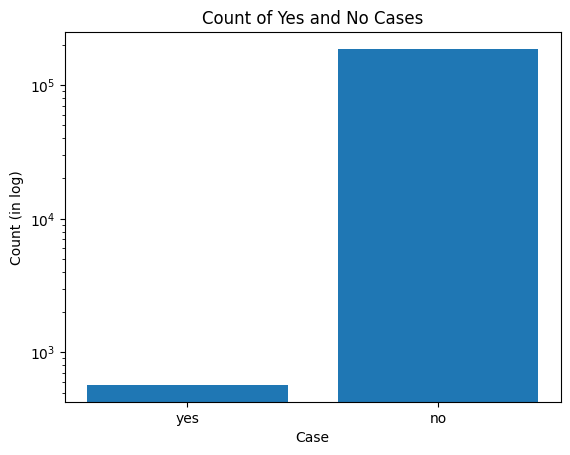

In [9]:
yes_count = state_df[state_df['case'] == 'yes']['case'].count()
no_count = state_df[state_df['case'] == 'no']['case'].count()
# Data for the plot
values = [yes_count, no_count]
labels = ['yes', 'no']

# Create a bar plot
plt.bar(labels, values)

plt.yscale('log')

# Add labels and a title
plt.xlabel('Case')
plt.ylabel('Count (in log)')
plt.title('Count of Yes and No Cases')

plt.savefig('California_log_scale.png')
# Display the plot
plt.show()


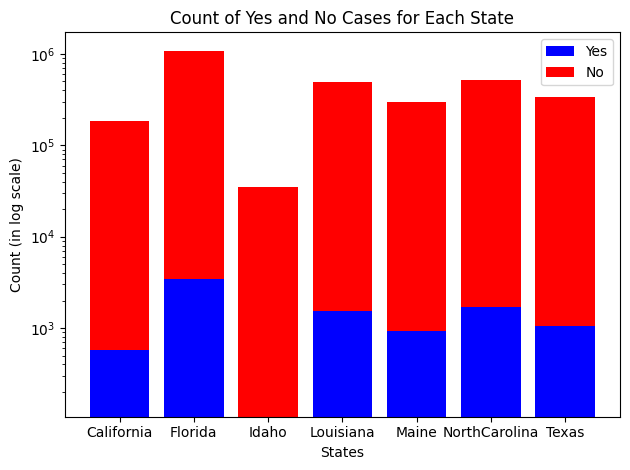

In [21]:

# List of file paths for the six states
folder_path = 'Vertices_Labels/'
file_paths = ['California.parq', 'Florida.parq', 'idaho.parq', 'Louisiana.parq', 'Maine.parq', 'NorthCarolina.parq', 'Texas.parq']

# Initialize lists to store counts for 'Yes' and 'No' for each state
yes_counts = []
no_counts = []

yes_color = 'blue'
no_color = 'red'

# Loop through the files for each state
for file_path in file_paths:
    # Read the Parquet file into a DataFrame for the current state
    df = pd.read_parquet(folder_path + file_path)

    # Count the number of 'Yes' and 'No' values in the 'case' column
    yes_count = df[df['case'] == 'yes']['case'].count()
    no_count = df[df['case'] == 'no']['case'].count()

    # Append the counts to the respective lists
    yes_counts.append(yes_count)
    no_counts.append(no_count)

# Data for the plot
states = ['California', 'Florida', 'Idaho', 'Louisiana', 'Maine', 'NorthCarolina', 'Texas']
yes_labels = ['yes'] * len(states)
no_labels = ['no'] * len(states)
values = [yes_counts, no_counts]

# Create a stacked bar plot with different colors and legends
fig, ax = plt.subplots()

# Plot 'Yes' counts
for i, state in enumerate(states):
    ax.bar(state, yes_counts[i], label=f'{state} - Yes', color=yes_color)

# Plot 'No' counts on top of 'Yes' counts
for i, state in enumerate(states):
    ax.bar(state, no_counts[i], label=f'{state} - No', color=no_color, bottom=yes_counts[i])

plt.yscale('log')

# Add labels and a title
plt.xlabel('States')
plt.ylabel('Count (in log scale)')
plt.title('Count of Yes and No Cases for Each State')

# Create a legend with just two entries: 'Yes' and 'No'
yes_patch = plt.bar(0, 0, color=yes_color, label='Yes')
no_patch = plt.bar(0, 0, color=no_color, label='No')

# Add the legend
ax.legend(handles=[yes_patch, no_patch])

# Show the stacked bar plot
plt.tight_layout() 

plt.savefig('All_states_log_scale.png')
# Show the stacked bar plot
plt.show()

In [41]:
def plot_box_plot(column_name):
    # List of file paths for the six states
    folder_path = 'Vertices_Labels/'
    file_paths = ['California.parq', 'Florida.parq', 'idaho.parq', 'Louisiana.parq', 'Maine.parq', 'NorthCarolina.parq', 'Texas.parq']
    data = []

    # Loop through the files for each state and extract 'Latitude' data
    for file_path in file_paths:
        # Read the Parquet file into a DataFrame for the current state
        df = pd.read_parquet(folder_path + file_path)

        df = df.dropna(subset=[column_name])

        data.append(df[column_name])

    # Create a box plot for 'Latitude' for each state
    box = plt.boxplot(data, labels=['California', 'Florida', 'Idaho', 'Louisiana', 'Maine', 'NorthCarolina', 'Texas'],
                showfliers=False)

    # Add labels and a title
    plt.xlabel('States')
    plt.ylabel(f'{column_name}')
    plt.title(f'Box Plot of {column_name} for Different States')
    # Show the box plot
    plt.savefig(f'box_plot_{column_name}.png')
    plt.show()

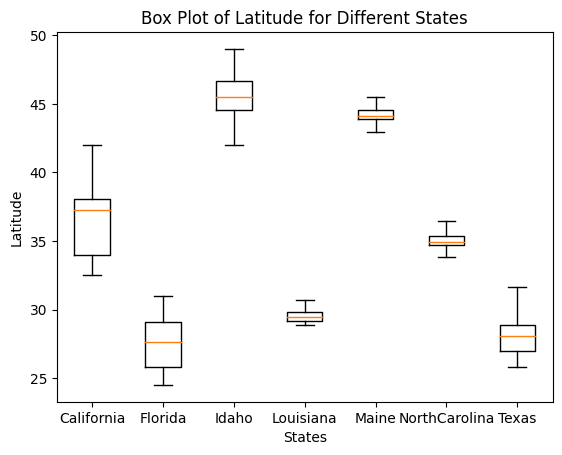

In [42]:
plot_box_plot('Latitude')

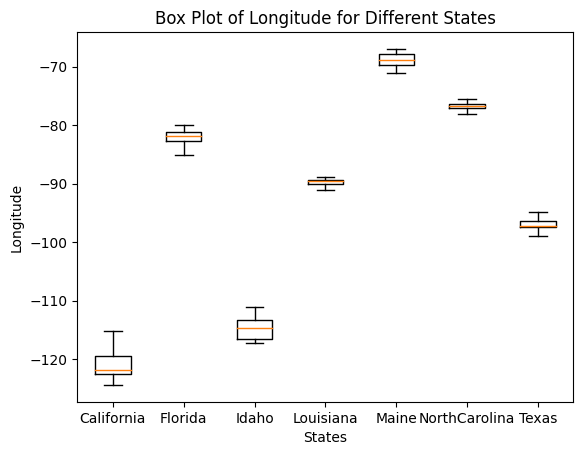

In [43]:
plot_box_plot('Longitude')

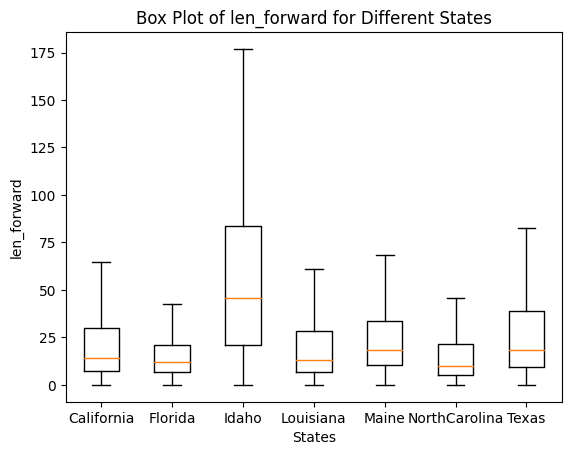

In [44]:
plot_box_plot('len_forward')

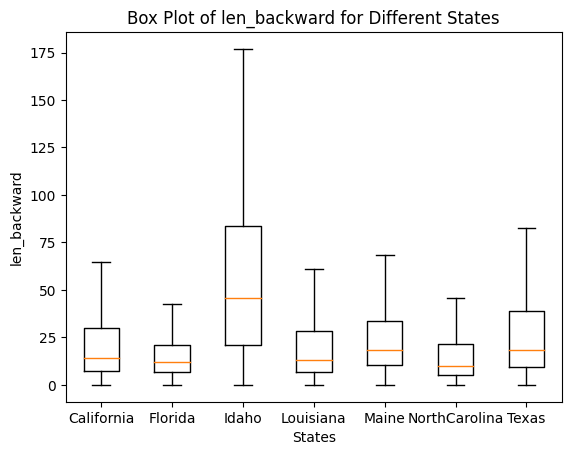

In [45]:
plot_box_plot('len_backward')

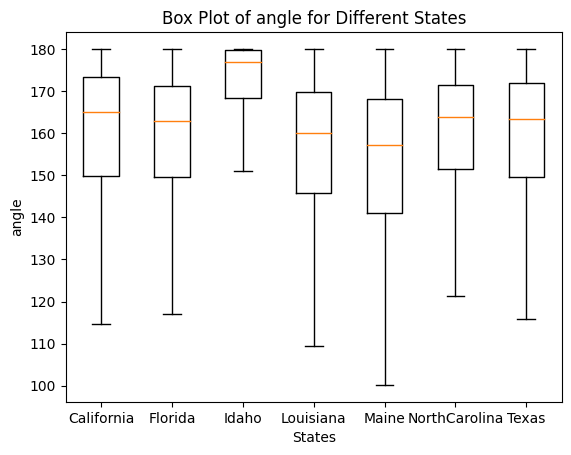

In [46]:
plot_box_plot('angle')

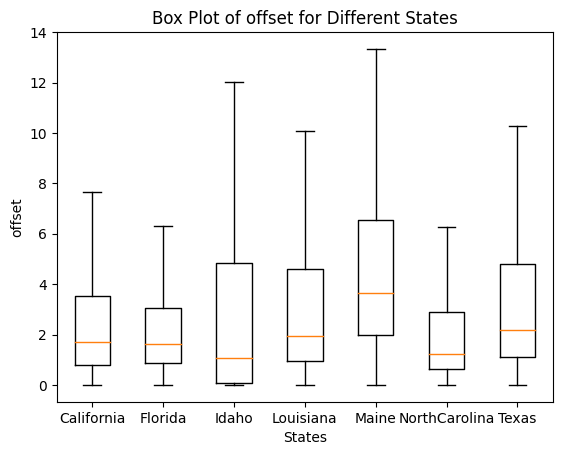

In [47]:
plot_box_plot('offset')

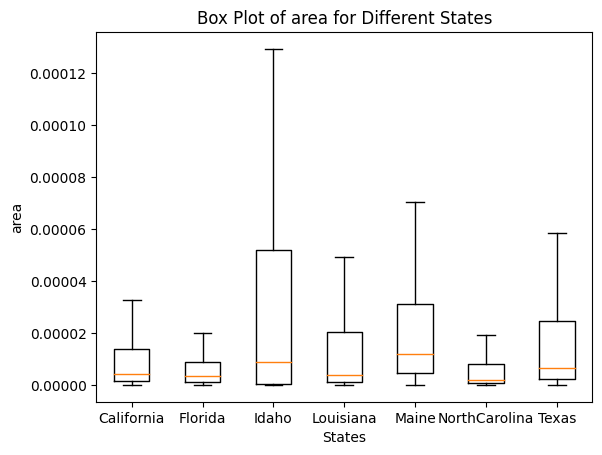

In [48]:
plot_box_plot('area')

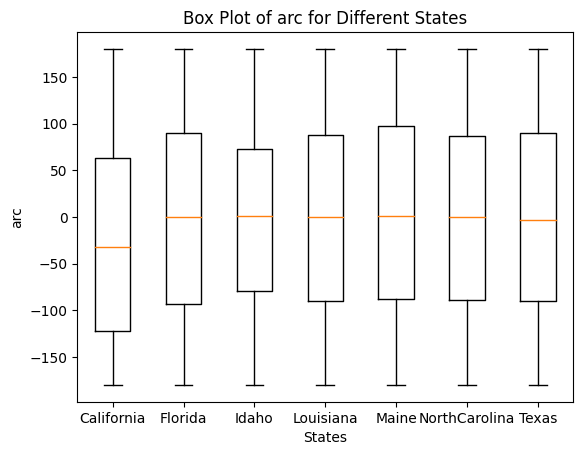

In [49]:
plot_box_plot('arc')

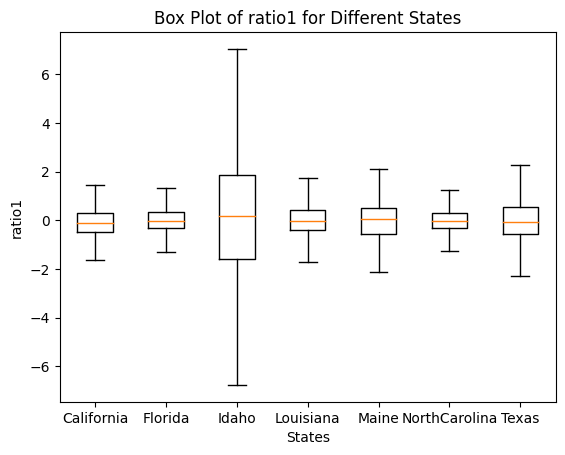

In [50]:
plot_box_plot('ratio1')

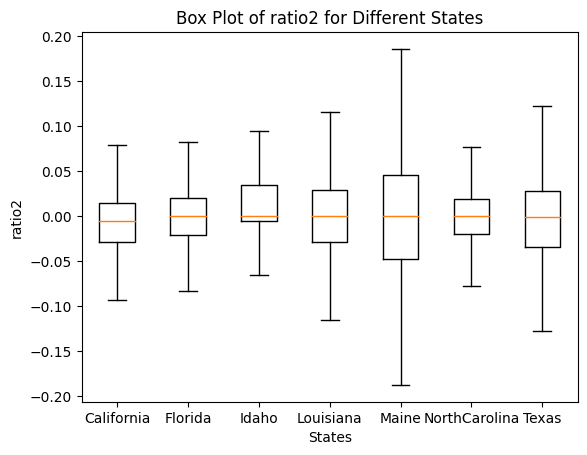

In [51]:
plot_box_plot('ratio2')

/tmp/ipykernel_1297057/621138198.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
/tmp/ipykernel_1297057/621138198.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
/tmp/ipykernel_1297057/621138198.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
/tmp/ipykernel_1297057/621138198.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a fut

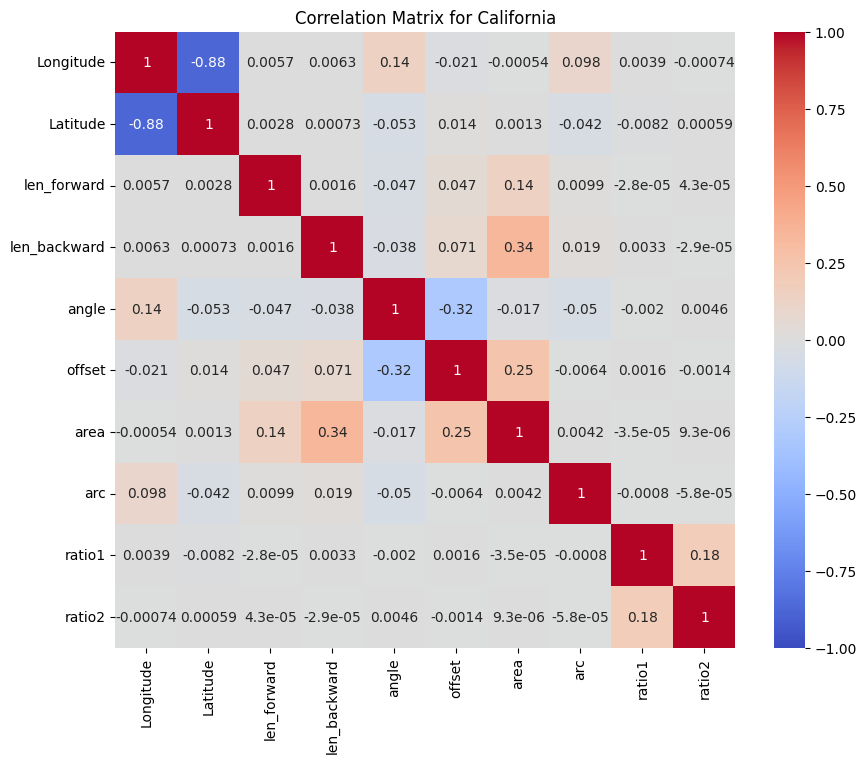

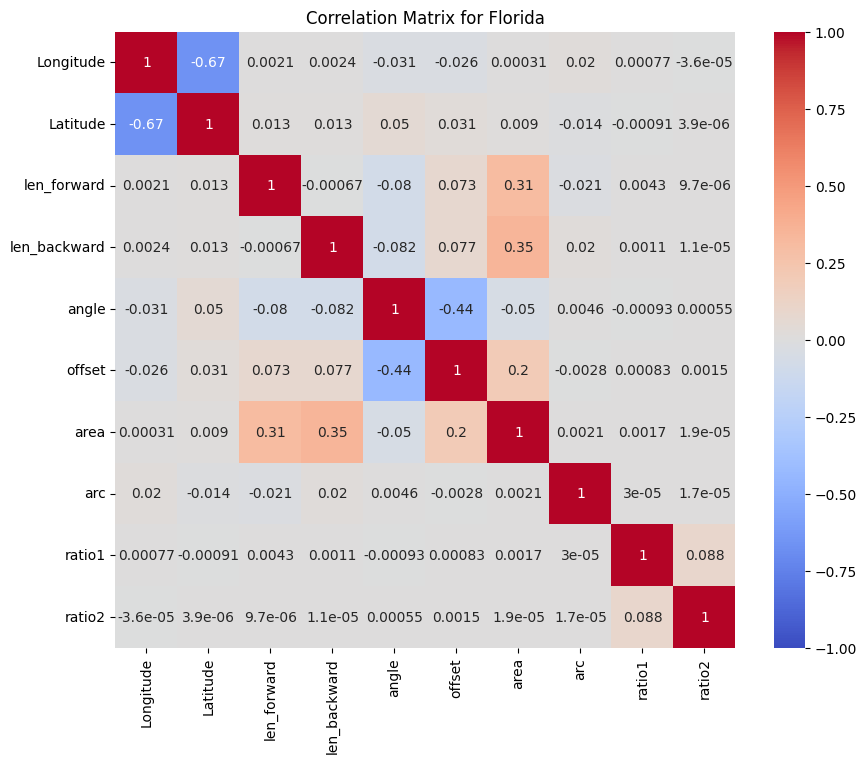

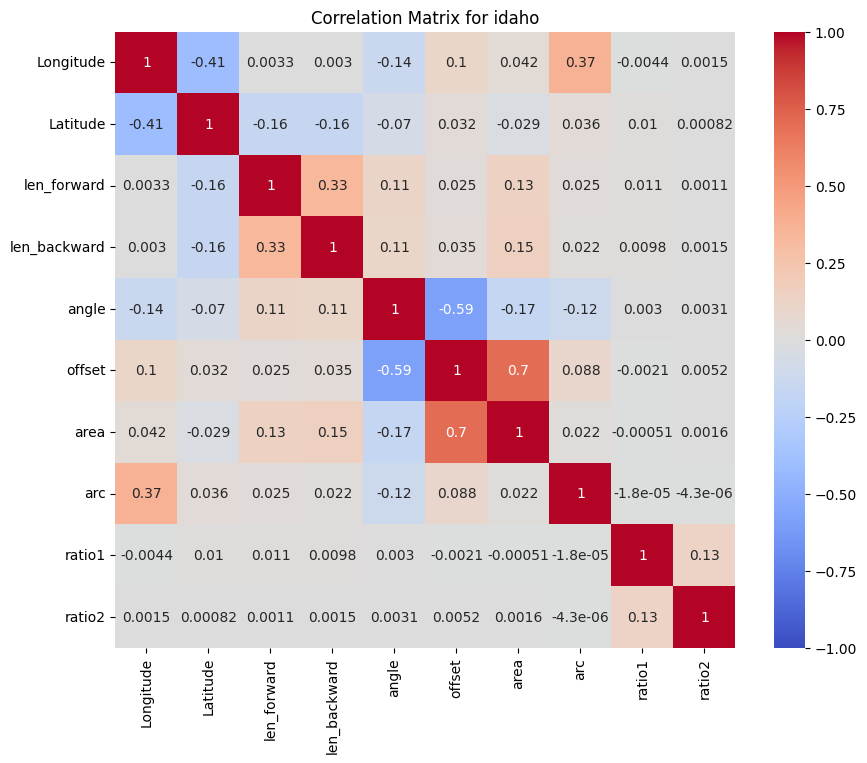

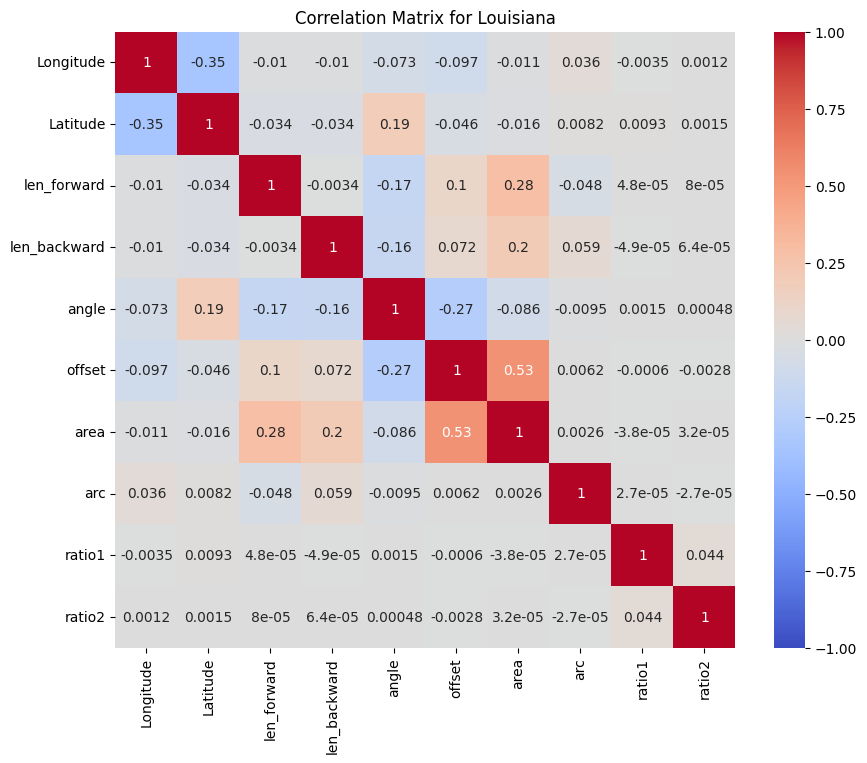

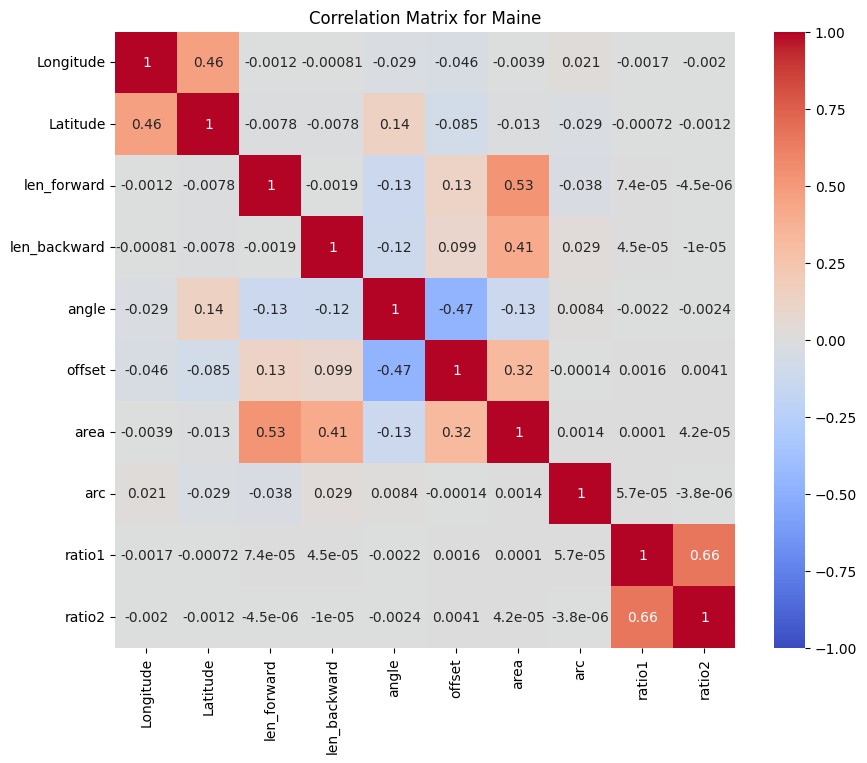

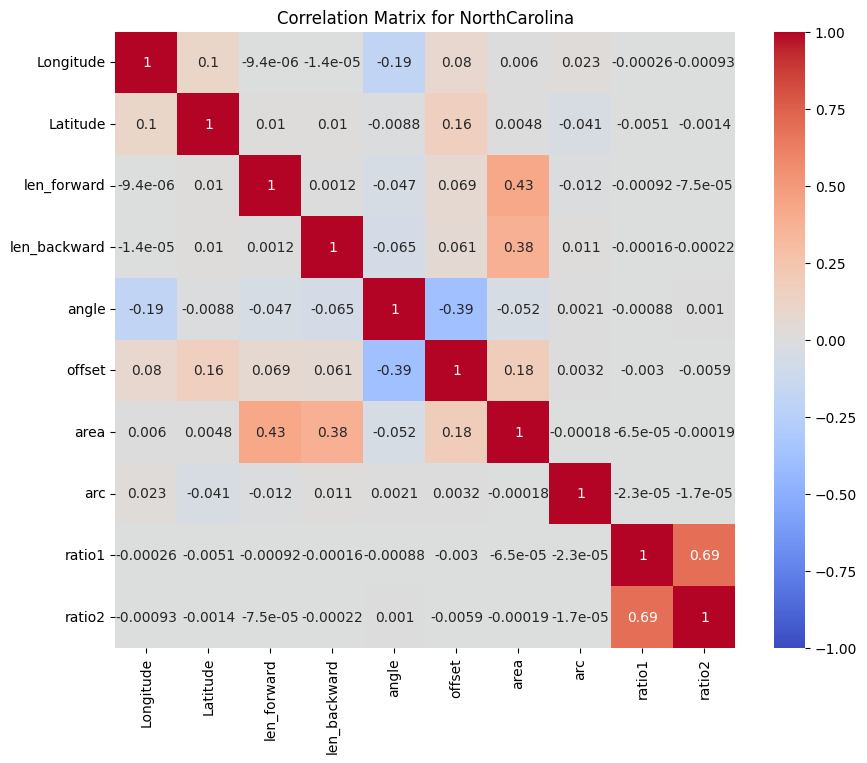

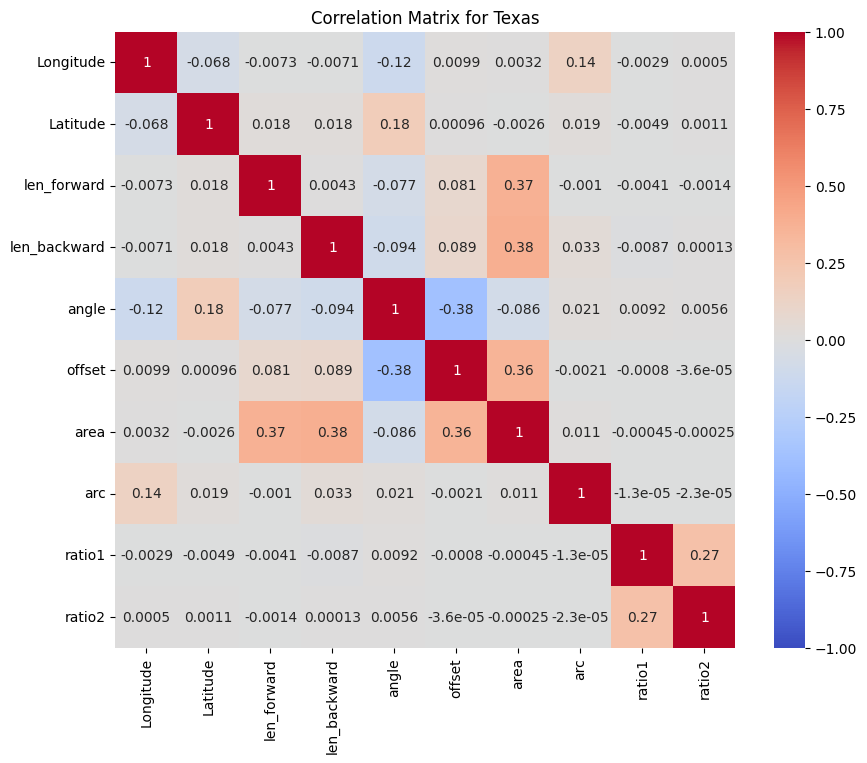

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = 'Vertices_Labels/'
file_paths = ['California.parq', 'Florida.parq', 'idaho.parq', 'Louisiana.parq', 'Maine.parq', 'NorthCarolina.parq', 'Texas.parq']

# Initialize a dictionary to store correlation matrices for each state
correlation_matrices = {}

# Loop through the files for each state
for file_path in file_paths:
    # Read the Parquet file into a DataFrame for the current state
    df = pd.read_parquet(folder_path + file_path)
    
    # Calculate the correlation matrix for the current state's DataFrame
    correlation_matrix = df.corr()
    
    # Store the correlation matrix in the dictionary
    state_name = file_path.split('.')[0]  # Extract the state name from the file name
    correlation_matrices[state_name] = correlation_matrix

# Visualize the correlation matrices
for state_name, correlation_matrix in correlation_matrices.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {state_name}')
    plt.savefig(f'corr_matrix_{state_name}.png')
    # plt.show()


In [18]:
import torch
import pandas as pd

# state_df = pd.read_parquet('Vertices_Labels/Maine.parq')

state_df = pd.read_parquet('Maine_with_predictions.parquet')
yes_count = state_df[state_df['case'] == 'yes']['case'].count()
no_count = state_df[state_df['case'] == 'no']['case'].count()
print(f"Original ground truth Yes and no {yes_count}, {no_count}")
print("*"*30)

yes_count = state_df[state_df['predicted'] == 1]['predicted'].count()
no_count = state_df[state_df['predicted'] == 0]['predicted'].count()
print(f"Predicted Yes and no {yes_count}, {no_count}")
print("*"*30)

Original ground truth Yes and no 924, 293447
******************************
Predicted Yes and no 125588, 168783
******************************


In [17]:
state_df.head()

,Longitude,Latitude,len_forward,len_backward,angle,offset,area,arc,ratio1,ratio2,case,predicted
0,-70.607901,42.979219,62.69,18.19,0.000000,0.000000,0.000000,24.424197,0.056396,0.000000,no,0
1,-70.607247,42.978922,48.47,62.69,159.922621,12.612648,0.000142,4.346818,25.572730,2.901582,no,1
2,-70.606655,42.978877,14.38,48.47,147.773783,7.464846,0.000047,36.573035,1.718479,0.204108,no,1
3,-70.606531,42.978785,53.43,14.38,126.692391,11.298979,0.000058,89.880644,0.754445,0.125711,no,1
4,-70.606530,42.978305,32.57,53.43,132.484600,17.747323,0.000116,137.396044,0.625928,0.129169,no,1
